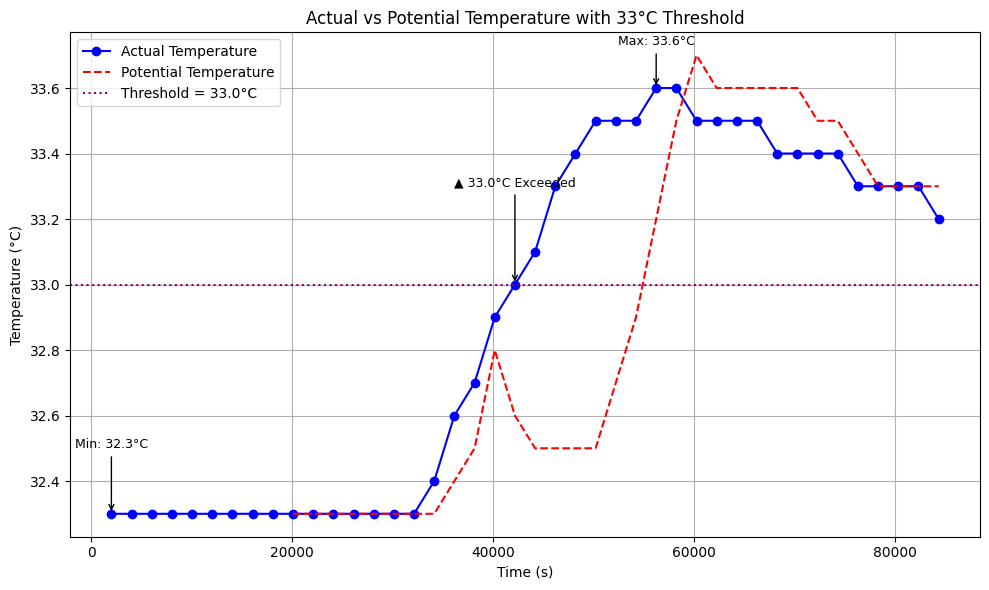

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("temperature_log.csv")

# Set threshold
threshold = 33.0

# Convert columns to numeric (handle "N/A" or missing)
df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
df["Potential_Temperature"] = pd.to_numeric(df["Potential_Temperature"], errors="coerce")

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Time (s)"], df["Temperature"], label="Actual Temperature", color='blue', marker='o')
plt.plot(df["Time (s)"], df["Potential_Temperature"], label="Potential Temperature", color='red', linestyle='--')
plt.axhline(y=threshold, color='purple', linestyle=':', label=f'Threshold = {threshold}°C')

# --- Annotations inside the plot (tightly) ---

# First threshold exceed annotation
crossing_indices = df[df["Temperature"] >= threshold].index
if not crossing_indices.empty:
    first_crossing = crossing_indices[0]
    x_cross = df["Time (s)"][first_crossing]
    y_cross = df["Temperature"][first_crossing]
    plt.annotate(f'▲ {threshold}°C Exceeded',
                 xy=(x_cross, y_cross),
                 xytext=(x_cross, y_cross + 0.3),
                 ha='center',
                 fontsize=9,
                 color='black',
                 arrowprops=dict(arrowstyle='->', color='black'))

# Max temperature point
max_idx = df["Temperature"].idxmax()
x_max = df["Time (s)"][max_idx]
y_max = df["Temperature"][max_idx]
plt.annotate(f'Max: {y_max:.1f}°C',
             xy=(x_max, y_max),
             xytext=(x_max, y_max + 0.13),
             ha='center',
             fontsize=9,
             color='black',
             arrowprops=dict(arrowstyle='->', color='black'))

# Min temperature point
min_idx = df["Temperature"].idxmin()
x_min = df["Time (s)"][min_idx]
y_min = df["Temperature"][min_idx]
plt.annotate(f'Min: {y_min:.1f}°C',
             xy=(x_min, y_min),
             xytext=(x_min, y_min + 0.2),
             ha='center',
             fontsize=9,
             color='black',
             arrowprops=dict(arrowstyle='->', color='black'))

# Plot formatting
plt.title("Actual vs Potential Temperature with 33°C Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
